# An exploration of Ford GoBike data

## Table of contents

<ul>
    <li><a href="#wrangling">Preliminary wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
        <ul>
            <li><a href="#univariate">Univariate exploration</a></li>
            <li><a href="#bivariate">Bivariate exploration</a></li>
            <li><a href="#multivariate">Multivariate exploration</a></li>
        </ul>
</ul>

<a id='wrangling'></a>
## Preliminary wrangling

In this section we will be assessing and cleaning a bit the data before diving into the visual exploration.

In [74]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from math import sin, cos, sqrt, atan2 

In [75]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('../data/201902-fordgobike-tripdata.csv')

In [76]:
# high-level overview of data 
#shape 
bikes.shape

(183412, 16)

In [77]:
# high-level overview of data 
# variables' types
bikes.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [78]:
# high-level overview of data 
bikes.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [79]:
# data variables
list(bikes)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [80]:
# drop rows  with nan
bikes.dropna(inplace=True)
bikes.shape

(174952, 16)

In [81]:
# reset index 
bikes.reset_index(drop=True, inplace=True)

In [82]:
# convert  to int
to_int_list = ['start_station_id', 'end_station_id', 'member_birth_year']
for var in to_int_list:
    bikes[var] = bikes[var].astype(int)

In [83]:
# convert to datetime
to_datetime_list = ['start_time', 'end_time']
for date in to_datetime_list: 
    bikes[date] = pd.to_datetime(bikes[date])

In [84]:
# convert to category
to_category_list = ['user_type', 'member_gender','bike_share_for_all_trip']
for cat_var in to_category_list: 
    bikes[cat_var] = bikes[cat_var].astype('category')

In [85]:
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### What is the structure of the dataset?

There are **174952** bikes rentals and **16** variables describing each rental. These variables give information about:


- time: `duration_sec`, `start_time`, `end_time`;


- location: `start_station_id`,	`start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude` and	`end_station_longitude`;


- bikes: `bike_id`;


- users:  `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`.

#### What is/are the main feature(s) of interest in the dataset?

We are most interested in finding the relationship between Ford GoBike type users, their travelled distance and and rental duration.

#### What features in the dataset will help support your investigation into your feature(s) of interest?

We think that the following variables will be very helpful for the analysis: 

`duration_sec`, `start_time`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, 



`end_station_longitude` `user_type`, `member_birth_year` and `member_gender`.

The longitudes and latitudes provided will help us compute the distance between the start station and the end station which is very valuable. Moreover, the rental start time will help us find the days of the week which will be used in the course of the analysis. Finally, we will compute member age using members' birthday year.

<a id='eda'></a>
## Exploratory Data Analysis

In this part of the document, we will be looking for relationships in the data and connect to our features of interest.  

<a id='univariate'></a>
### Univariate exploration

**Compute distance between start station and end station.** 

In [86]:
def compute_distance(lon1, lat1, lon2, lat2):
    """   
        Compute distance between two points using Haversine formula 
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    meter = 6367000 * c # distance in meter
    return meter

In [87]:
# create distance column in bikes dataframe and distance between start station and end station
bikes['distance'] = compute_distance(bikes['start_station_longitude'], bikes['start_station_latitude'], bikes['end_station_longitude'], bikes['end_station_latitude'])

In [88]:
# drop longitude and latitude columns from dataset
cols_to_drop = ['start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude']
bikes = bikes.drop(cols_to_drop, axis=1)
list(bikes)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'distance']

**Rental day of the week**

In [89]:
bikes['rental_day'] = bikes.start_time.dt.dayofweek
bikes['rental_day'].head()

0    3
1    3
2    3
3    3
4    3
Name: rental_day, dtype: int64

In [90]:
# change integers to real days
days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bikes.rental_day.replace(days_dict, inplace=True)
bikes.rental_day.head()

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: rental_day, dtype: object

In [91]:
# convert rental_weekday to categorical data type
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    rental_day = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
    bikes['rental_day'] = bikes['rental_day'].astype(rental_day)
else:
    bikes['rental_day'] = bikes['rental_day'].astype('category', ordered = True,
                                                         categories = weekdays)

In [92]:
list(bikes)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'distance',
 'rental_day']

##### `Insight 1:` Distribution of duration_sec

In [93]:
bikes.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

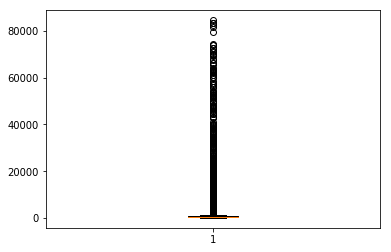

In [139]:
# summary statistic boxplot
plt.boxplot(data=bikes, x='duration_sec');

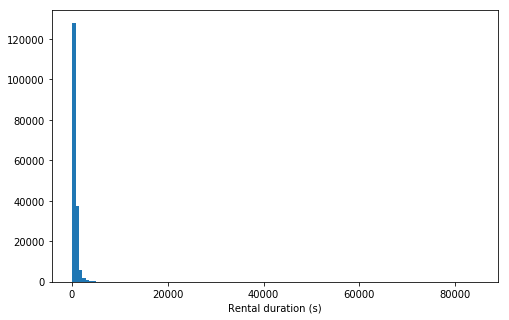

In [94]:
binsize = 700
bins = np.arange(61, bikes.duration_sec.max()+binsize, binsize)

plt.figure(figsize=([8,5]))
plt.hist(data=bikes, x='duration_sec', bins=bins)
plt.xlabel('Rental duration (s)')
plt.show()

In [95]:
np.log10(bikes.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

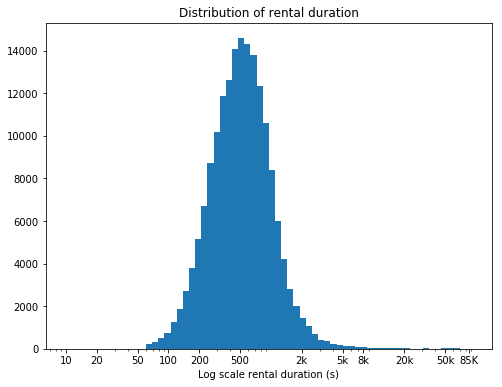

In [96]:
# the plot is highly skewed, so let's put it on a log scale instead
log_binsize = 0.06
bins = 10 ** np.arange(1, np.log10(bikes['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 2e3, 5e3, 8e3, 2e4, 5e4, 8.5e4], ['10', '20', '50', '100', '200', '500', '2k', '5k', '8k', '20k', '50k', '85K'])
plt.xlabel('Log scale rental duration (s)')
plt.title('Distribution of rental duration')
plt.show()

> Rental duration distribution is highly left skwed. The plot is not clear to find good insights. So, we plotted a  log scale duration. We can see that the plot is normal with a peak at 500s. This suggests that the rental duration distribution is log-normal.

##### `Insight 2:`Distribution of the distance between start station and end station.

In [97]:
bikes.distance.describe()

count    174952.000000
mean       1688.988019
std        1096.268003
min           0.000000
25%         909.871587
50%        1428.931627
75%        2222.613575
max       69425.624772
Name: distance, dtype: float64

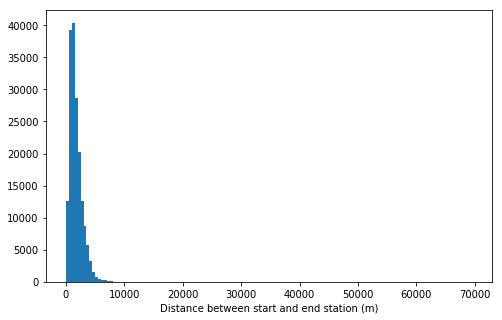

In [98]:
#bins
binsize = 500
bins = np.arange(0, bikes.distance.max()+binsize, binsize)

plt.figure(figsize=([8,5]))
plt.hist(data=bikes, x='distance', bins=bins)
plt.xlabel('Distance between start and end station (m)')
plt.show()

In [99]:
# null distances 
bikes.query('distance == 0').shape

(3458, 14)

In [100]:
np.sqrt(bikes.distance.describe())

count    418.272638
mean      41.097299
std       33.109938
min        0.000000
25%       30.164078
50%       37.801212
75%       47.144603
max      263.487428
Name: distance, dtype: float64

In [101]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

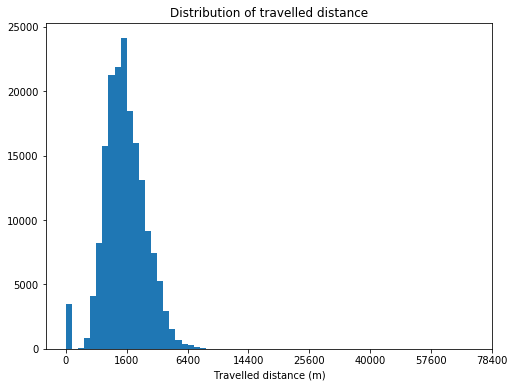

In [102]:
plt.figure(figsize=[8, 6])
bin_edges = np.arange(0, sqrt_trans(bikes['distance'].max())+4, 4)
plt.hist(bikes['distance'].apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(bikes['distance'].max())+40, 40 )
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
plt.xlabel('Travelled distance (m)')
plt.title('Distribution of travelled distance');
plt.show()

> The distance between start station and end station is highly left skewed like rental duration. Then, plotting the log scale distribution will be interesting. However, there are **3458** with a null distance. This means there are many stations that serve as start and end station simultaneously. So it is not relevant to drop those lines. Moreover, the distances are large numbers. Thus, we think that a square root scale transformation can be a good choice. The result is very interestiong. The distribution is globally normal. Most of the data is set to the far left of the x-axis, suggesting strong outliers on the right. Let's find out these outiliers and drop them.

**Outtliers**


- Lower whisker bound: $Q_{1} - 1.5(IQR)$


- Upper whisker bound: $Q_{3} - 1.5(IQR)$

In [103]:
# compute IQR
iqr = 2222.61 - 909.87
iqr

1312.7400000000002

In [104]:
# lower outliers; Q1 = 909.87 

lower_outliers = 909.87 - (1.5 * iqr)
lower_outliers

-1059.2400000000002

In [105]:
# higher outliers; Q3 = 2222.61  

higher_outliers = 2222.61 + (1.5 * iqr)
higher_outliers

4191.72

In [106]:
# select rows without outliers
bikes = bikes.query('distance > @lower_outliers or distance < @higher_outliers')
bikes.shape

(174952, 14)

##### `Insight 3:` Age classification of members

In [107]:
# convert member_birthday_year to int
bikes['member_birth_year'] = bikes['member_birth_year'].astype(int)

In [108]:
# computer members's ages and store in member_age column
bikes['member_age'] = 2020 - bikes['member_birth_year']
bikes['member_age'].head()

0    36
1    48
2    31
3    46
4    61
Name: member_age, dtype: int64

In [109]:
bikes.member_age.describe()

count    174952.000000
mean         35.196865
std          10.118731
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         142.000000
Name: member_age, dtype: float64

> The average age of members is **35**

**Create age groups** 


Since the miimum age is 19, we will create 5 age groups starting from it. 

- 19-20: adolescence

- 20-35: Early adulthood

- 35-50: Middle adulthood

- 50-80: Mature adulthood

- 80: Late aldulthood or old age

In [110]:
# create age groups in member_age_group column 
age_bins = [19, 20, 35, 50, 80, 110]

labels = ['Teen','Early adult','Middle adult','Mature adult','Late aldult']

bikes['member_age_group'] = pd.cut(bikes['member_age'], bins=age_bins, labels=labels, right=False)

bikes.member_age_group.value_counts()

Early adult     100410
Middle adult     56651
Mature adult     17654
Late aldult        131
Teen                34
Name: member_age_group, dtype: int64

In [111]:
# convert age group to categorical data type
age_groups = ['Teen','Early adult','Middle adult','Mature adult','Late aldult']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    order_group = pd.api.types.CategoricalDtype(ordered = True, categories = age_groups)
    bikes['member_age_group'] = bikes['member_age_group'].astype(order_group)
else:
    bikes['member_age_group'] = bikes['member_age_group'].astype('category', ordered = True,
                                                         categories = age_groups)

In [112]:
def show_bar_proportion(type_counts, ticks_locs, ticks_labels, prop_loc_const, prop_text_size):
    '''
       Goal: Show proportion below the top of each bar plot.
       @type_counts: Varible value counts
       @ticks_locs: Current ticks locations
       @ticks_labels: Current ticks labels
       @prop_loc_const: Constant to properly position proportion just below the top of the bar
       @prop_text_size: proportion text size
    '''
    for loc, label in zip(ticks_locs, ticks_labels):
        # get the current tick locations and labels
        count = type_counts[label.get_text()]
        pct_string = '{:0.2f}%'.format(100*count/type_counts.sum())
        # print the annotation just below the top of the bar
        plt.text(loc, count+prop_loc_const, pct_string, ha = 'center', color = 'black', size=prop_text_size)

In [113]:
# Source: Stackoverflow; Question ID: 43585333
# create a text field as a legend handler
class TextHandler(HandlerBase):
    '''
     The following class creates a TextHandler to be used to create the legend artist.
    '''
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2,height/2,tup[0], fontsize=fontsize,
                  ha="right", va="center", color='#000000')
        return [tx]

In [114]:
def show_legend(ax):
    '''Show customized legend'''
    groups_word = ['Teen','Early adult','Middle adult','Mature adult','Late aldult']
    groups_num = ['19-20','20-35','35-50','50-80','>=80']
    actual_xtick_labels = ax.get_xticklabels() 
    label_dic = dict(zip(groups_word, groups_num))
    labels = [label_dic[h.get_text()]  for h in actual_xtick_labels]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(actual_xtick_labels,ax.patches)]
    ax.legend(handles, labels, handler_map={tuple : TextHandler()}, loc='upper right', frameon=False)

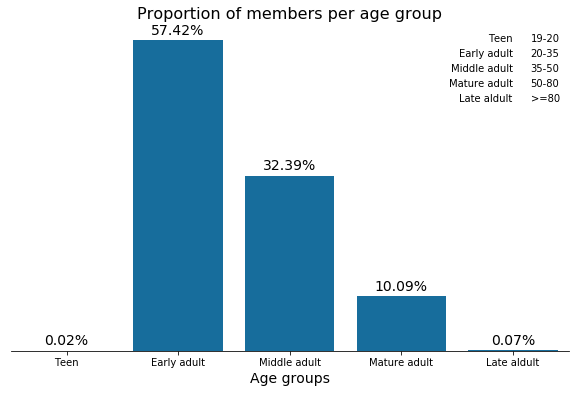

In [115]:
# set fig size
plt.figure(figsize = [10, 6])

#color
base_color = sns.color_palette("colorblind")[0]

# age groups count 
age_group_count = bikes.member_age_group.value_counts()


ax = sns.countplot(data=bikes, x='member_age_group', color=base_color)

# get the current xtick locations and labels
ticks_locs, ticks_labels = plt.xticks() 
# don't show yticks
plt.yticks([],[]) 
show_bar_proportion(age_group_count, ticks_locs, ticks_labels, 2000, 14)

# xlabel
plt.xlabel('Age groups', size=14)
# don't show ylabel        
plt.ylabel('')

# plot title
plt.title('Proportion of members per age group', size=16);

#legend
show_legend(ax)

#remove top and right spines from plot
sns.despine(left=True)

> The plot suggests that teenagers and old people rent less bikes. Early adult rent the most, followed by middle adult and then mature adults.

##### `Insight  4:` Proportion of Subscribers and Consumers to Ford GoBike service

In [116]:
bikes.user_type.value_counts().sum()

174952

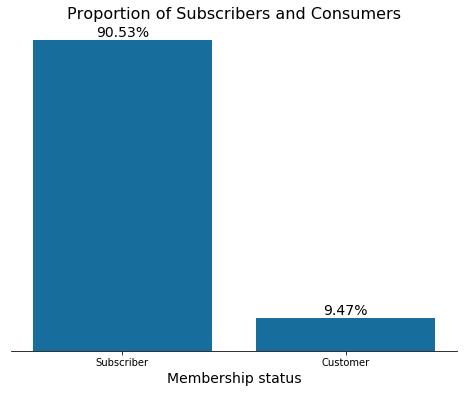

In [117]:
# set fig size
plt.figure(figsize = [8, 6])

#color
base_color = sns.color_palette("colorblind")[0]

# user type count 
user_type_count = bikes.user_type.value_counts()

# user type ordered 
type_order = user_type_count.index


sns.countplot(data=bikes, x='user_type', color=base_color, order=type_order)

# get the current xtick locations and labels
ticks_locs, ticks_labels = plt.xticks() 
# don't show yticks
plt.yticks([],[]) 
show_bar_proportion(user_type_count, ticks_locs, ticks_labels, 2000, 14)

# xlabel
plt.xlabel('Membership status', size=14)
# don't show ylabel        
plt.ylabel('')

# plot title
plt.title('Proportion of Subscribers and Consumers', size=16);

#remove top and right spines from plot
sns.despine(left=True)

> The plot shows that there are more subscribers than simple customers. This means that customers quickly adopt the service. This can be due to quality of service but also to the need of bikes in their daily travels to save time, money or just for wellness. This can be more clear if we find out days  when bikes are more rented. We will tackle in the bivariate exploration.

##### `Insight  5: ` Proportion of members per gender.

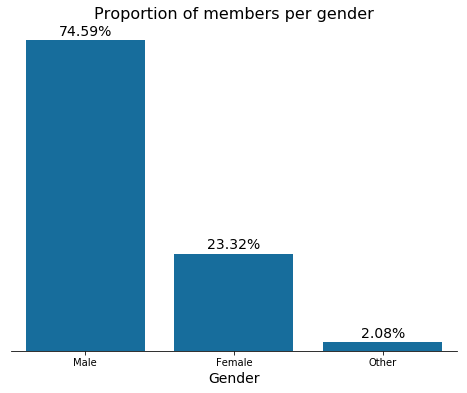

In [118]:
# set fig size
plt.figure(figsize = [8, 6])

#color
base_color = sns.color_palette("colorblind")[0]

# members' gender count 
gender_count = bikes.member_gender.value_counts()

# member gender ordered
gender_order = gender_count.index


sns.countplot(data=bikes, x='member_gender', color=base_color, order=gender_order)

# get the current xtick locations and labels
ticks_locs, ticks_labels = plt.xticks() 
# don't show yticks
plt.yticks([],[]) 
show_bar_proportion(gender_count, ticks_locs, ticks_labels, 2000, 14)

# xlabel
plt.xlabel('Gender', size=14)
# don't show ylabel        
plt.ylabel('')

# plot title
plt.title('Proportion of members per gender', size=16);

#remove top and right spines from plot
sns.despine(left=True)

> There are more male using the service than female and other genders. 

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the rental duration is highly skewed when plotted. So, we performed a log scale tranformation that results in a normal distribution with a peak at 500 seconds. We also plotted the square root distribution of the distance between start and end station. Actually, when plotted, the distance was highly skewed. But due to null distances and their large positive values we prefer a square root transformation. Then, we obtained a normal distribution at the end with a peak near 1600 meters.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After plotting the square root distribution of distance, we drop rows with outliers for the relevance of our findings.

> In the course of the univariate exploration, we created four new variables and drop four. Below are them and the why that motivates their creation. 
- `distance`: It is the travelled distance between start and end stations. We find it more useful than mere geographic coordinates. After computing it, we drop the four longitudes and latitudes variables for clarity in the dataframe. 
- `member_age`: Ford GoBike user's age. This is more useful `member_birth_year`. 
- `member_age_group`: This variable is creadted to aggregate users per age group. Five groups have been ifentified: **Teen** (19-20), **Early adult** (20-35), **Middle adult** (35-50), **Mature adult** (50-80) and **Late aldult** (>=80). 
- `rental_day`: This variable is the week day when the bike is rent. 

<a id='bivariate'></a>
### Bivariate exploration

##### `Insight  1: `  distance vs. duration_sec

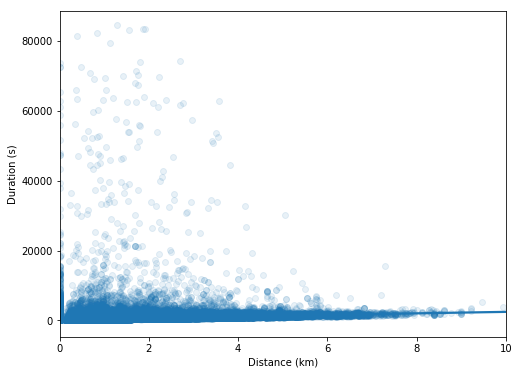

In [119]:
plt.figure(figsize=[8,6])
sns.regplot(data=bikes, x='distance', y='duration_sec', x_jitter = 0.3, scatter_kws={'alpha': 1/10})

plt.xlim([0, 10000])

distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]

ticks_labels = ['0', '2', '4', '6', '8', '10']
plt.xticks(distance_ticks, ticks_labels)

plt.xlabel('Distance (km)')
plt.ylabel('Duration (s)');
plt.show()

> The plot suggests a weak positive linear relationship between the distance travelled and the rental duration. Let's plot `distance` vs log `duration_sec` to see the trend.  We distance to 10km because most of the distances are less than it. 

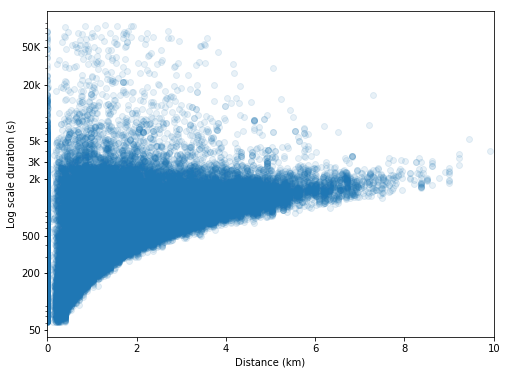

In [120]:
plt.figure(figsize=[8,6])

plt.scatter(data=bikes, x='distance', y='duration_sec', alpha=1/10)

plt.xlim([0, 10000])

distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]

ticks_labels = ['0', '2', '4', '6', '8', '10']
plt.xticks(distance_ticks, ticks_labels)

plt.xlabel('Distance (km)')

plt.yscale('log');
plt.yticks([50,  200, 500, 2e3, 3e3, 5e3, 2e4, 5e4], ['50', '200', '500', '2k', '3K', '5k', '20k', '50K'])
plt.ylabel('Log scale duration (s)');

plt.show()

> This plot suggests from the concavity that we might want to also transform the `distance` variable to see a linear trend. We can notice most of people rent bikes for 3000s (50 minutes) or less, maybe for one-off trips. Looking at the relationship between `rental_day` and `duration` will help us make more precise assumptions about users' profile.

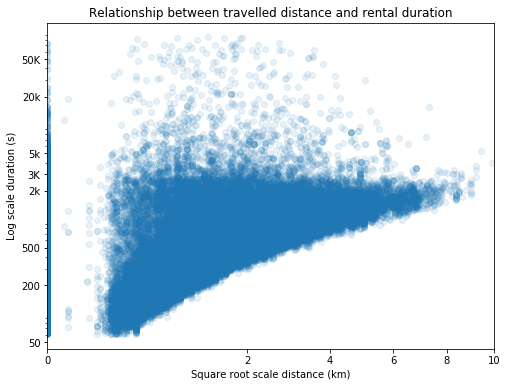

In [121]:
# scatter plot of distance vs.duration_sec, with log transform on duration_sec axis and
# square-root transform on distance

bikes['sr_distance'] = bikes['distance'].apply(sqrt_trans)

plt.figure(figsize=[8,6])

plt.scatter(data=bikes, x='sr_distance', y='duration_sec', alpha=1/10)

distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]

ticks_labels = ['0', '2', '4', '6', '8', '10']
plt.xticks(sqrt_trans(np.array(distance_ticks)), ticks_labels)

plt.xlim([0, sqrt_trans(10000)])

plt.xlabel('Square root scale distance (km)')

plt.yscale('log')
plt.yticks([50,  200, 500, 2e3, 3e3, 5e3, 2e4, 5e4], ['50', '200', '500', '2k', '3K', '5k', '20k', '50K'])
plt.ylabel('Log scale duration (s)');

plt.title('Relationship between travelled distance and rental duration')

plt.show()

The relationship looks more linear

##### `Insight  2: `  distance vs. rental_day and duration vs. rental_day

In [122]:
distance_per_week = bikes.groupby(['rental_day'], as_index=False)[['distance']].sum()
distance_per_week.head()

,rental_day,distance
0,Monday,4.283402e+07
1,Tuesday,5.229552e+07
2,Wednesday,4.821826e+07
3,Thursday,5.800767e+07
4,Friday,4.760192e+07


In [123]:
distance_per_week.describe()

,distance
count,7.000000e+00
mean,4.221312e+07
std,1.375078e+07
min,2.326231e+07
25%,3.305308e+07
50%,4.760192e+07
75%,5.025689e+07
max,5.800767e+07


In [124]:
duration_per_week = bikes.groupby(['rental_day'], as_index=False)[['duration_sec']].sum()
duration_per_week.head()

,rental_day,duration_sec
0,Monday,17871031
1,Tuesday,19966442
2,Wednesday,18906927
3,Thursday,22866504
4,Friday,18846102


In [125]:
duration_per_week.describe()

,duration_sec
count,7.000000e+00
mean,1.759524e+07
std,3.909736e+06
min,1.224861e+07
25%,1.516605e+07
50%,1.884610e+07
75%,1.943668e+07
max,2.286650e+07


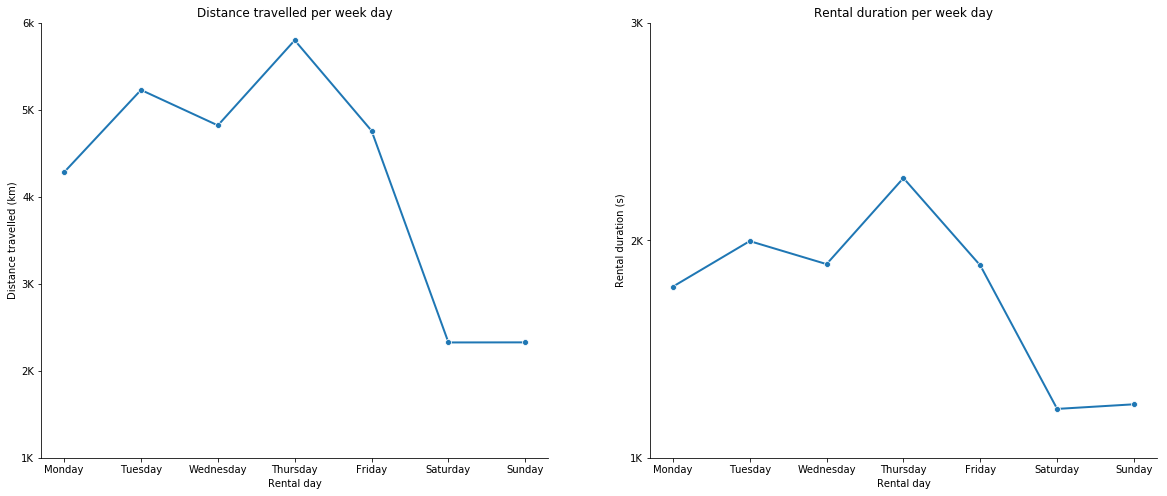

In [126]:
# set fig size
plt.figure(figsize = [20, 8])

# distance vs. rental_day subplot
plt.subplot(1,2,1)
sns.lineplot(x='rental_day', y='distance', data=distance_per_week, marker='o', linewidth=2, palette = base_color);

plt.yticks([1e7, 2e7, 3e7, 4e7, 5e7, 6e7], ['1K', '2K', '3K', '4k', '5K', '6k'])
plt.xlabel('Rental day')
plt.ylabel('Distance travelled (km)')
plt.title('Distance travelled per week day')

# distance vs. rental_day subplot
plt.subplot(1,2,2)
sns.lineplot(x='rental_day', y='duration_sec', data=duration_per_week, marker='o', linewidth=2, palette = base_color);

plt.yticks([1e7, 2e7, 3e7], ['1K', '2K', '3K'])
plt.xlabel('Rental day')
plt.ylabel('Rental duration (s)')
plt.title('Rental duration per week day')

sns.despine(right=True)
plt.show()

> The above plots suggest that distance travelled and rental duration are both higher during business days. We can see both subplots' peak on Thursday. Therefore, people rent bikes more during business day. Moreover, taking into account the fact that Early Middle and Mature adults rent more bikes, we may that renters user bikes for their ponctual reasons. For example, to get to work. Though we need more data to prove this assumption, let's look at the relationship between age groups and the travelled distance.

##### `Insight  3: `  distance vs. member_age_group

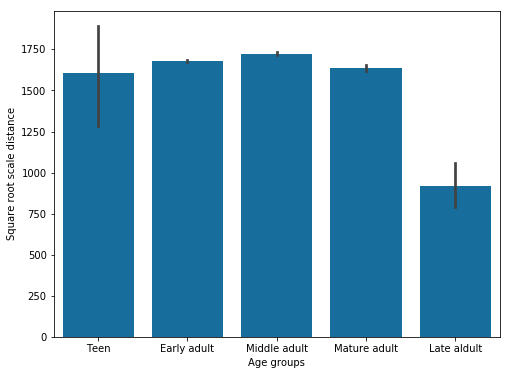

In [127]:
# set fig size
plt.figure(figsize = [8, 6])
sns.barplot(data=bikes, x='member_age_group', y='distance', color=base_color)
plt.xlabel('Age groups');
plt.ylabel('Square root scale distance')
plt.show()

> The plot suggests that on average adults people travelled the most with bikes except old adult (least average distance travelled). However, a close look at the data suggests a different conclusion. Indeed, teenagers are the least representative age group but the average distance travelled is not far from adults. To make this clear, let's look at the relationship between rental duration and age group. People who spend more time with bikes are more likely to have a higher travelled distance. Let's check this then.

##### `Insight  4: `  duration vs. member_age_group

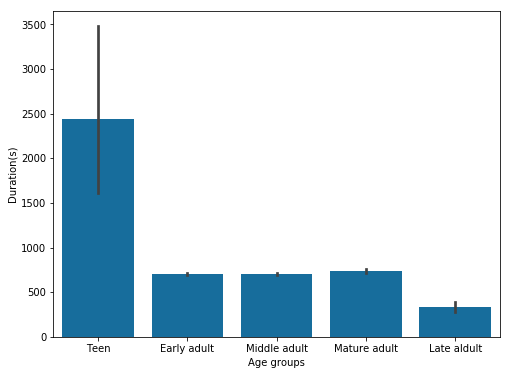

In [128]:
# set fig size
plt.figure(figsize = [8, 6])
sns.barplot(data=bikes, x='member_age_group', y='duration_sec', color=base_color)
plt.xlabel('Age groups');
plt.ylabel('Duration(s)')
plt.show()

As we presumed, teens tend to spend more times with bikes than adults. This can reinforces the hypothesis that adults (early, middle and mature) use bike for pontual trips. 

##### `Insight  5: `  user_type  vs. duration and   user_type  vs. distance

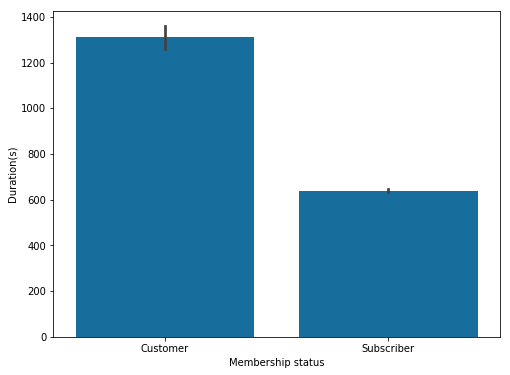

In [129]:
# set fig size
plt.figure(figsize = [8, 6])
sns.barplot(data=bikes, x='user_type', y='duration_sec', color=base_color)
plt.xlabel('Membership status');
plt.ylabel('Duration(s)')
plt.show()

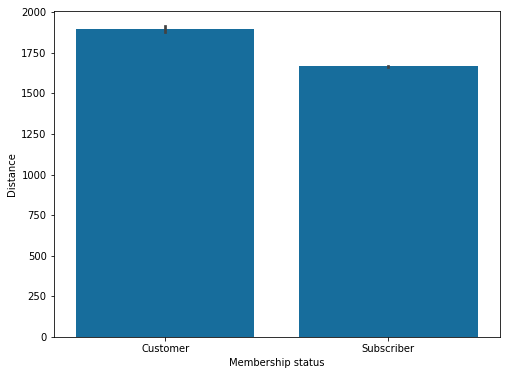

In [130]:
# set fig size
plt.figure(figsize = [8, 6])
sns.barplot(data=bikes, x='user_type', y='distance', color=base_color)
plt.xlabel('Membership status');
plt.ylabel('Distance')
plt.show()

The two plots suggests that subscribers use less bikes than costumers. Perhaps this customer live near to the stations and use bikes as means of travel for daily routines.   

##### `Insight  5: `  user_type  vs. member_gender

In [131]:
tg_counts = bikes.groupby(['user_type', 'member_gender']).size()
tg_counts = tg_counts.reset_index(name='count')
tg_counts.head()

,user_type,member_gender,count
0,Customer,Female,4623
1,Customer,Male,11493
2,Customer,Other,450
3,Subscriber,Female,36182
4,Subscriber,Male,119007


In [132]:
tg_counts = tg_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')

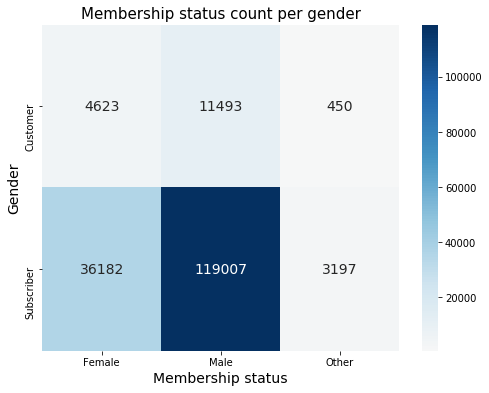

In [133]:
plt.figure(figsize = [8, 6])
ax = sns.heatmap(tg_counts, annot = True, fmt = 'd', cmap = 'RdBu', center = 0, annot_kws={"size": 14})
plt.xlabel('Membership status', size=14)
plt.ylabel('Gender', size=14)
plt.title('Membership status count per gender', size=15);
plt.show()

The heatmap suggests that there are more subscribers than customers for all genders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Rental duration and travelled distance have weak positive linear correlation before transformation. After performinga log transformation on duration and a square root transformation on distance, the relationship surprisingly appeared strong and almost linear. 


- Plotting the total distance travelled per day revealed that users rent bikes mostly during business days especially on Thurdays. Added to the fact that adults (early, middle and mature) rents more bikes than teenagers and old people, we can think that adults travelled and spend more time with bikes than others. But  unexpectedly, we found out that teenagers travel the most and spend more time with bikes despite the fact they are the least representative group in the dataset.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Male rent more bikes than female and other genders.

<a id='multivariate'></a>
### Multivariate exploration

##### `Insight  1: `  distance  vs. duration vs member_age_group

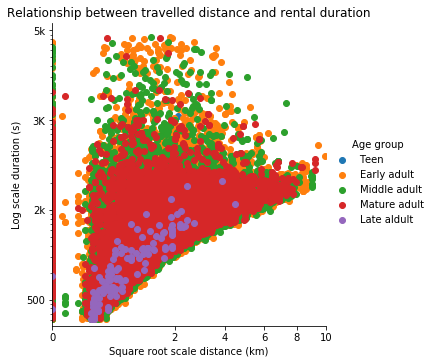

In [134]:
distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]

distance_ticks_labels = ['0', '2', '4', '6', '8', '10']

duration_ticks = [50,  200, 500, 2e3, 3e3, 5e3, 2e4, 5e4]

duration_ticks_labels = ['50', '200', '500', '2k', '3K', '5k', '20k', '50K']

title_label = 'Relationship between travelled distance and rental duration'

g = sns.FacetGrid(data = bikes, hue = 'member_age_group', size = 5)
g.map(plt.scatter, 'sr_distance', 'duration_sec')
g.set(yscale='log', xticks=sqrt_trans(np.array(distance_ticks)), yticks=duration_ticks,
      xlim=[0, sqrt_trans(10000)], xlabel='Square root scale distance (km)',
      ylabel = 'Log scale duration (s)',
      title=title_label)
g.set_xticklabels(distance_ticks_labels)
g.set_yticklabels(duration_ticks_labels)
g.add_legend(title = 'Age group');

On this plot we can clearly see how each group is represented in terms of distance travelled and rental delay. Since teenagers are less representative they are almost invisble on the plot. The other groups are visible. Early, middle and mature old ride more than old people. 

##### `Insight  2: `  rental_day vs. distance  vs member_age_group

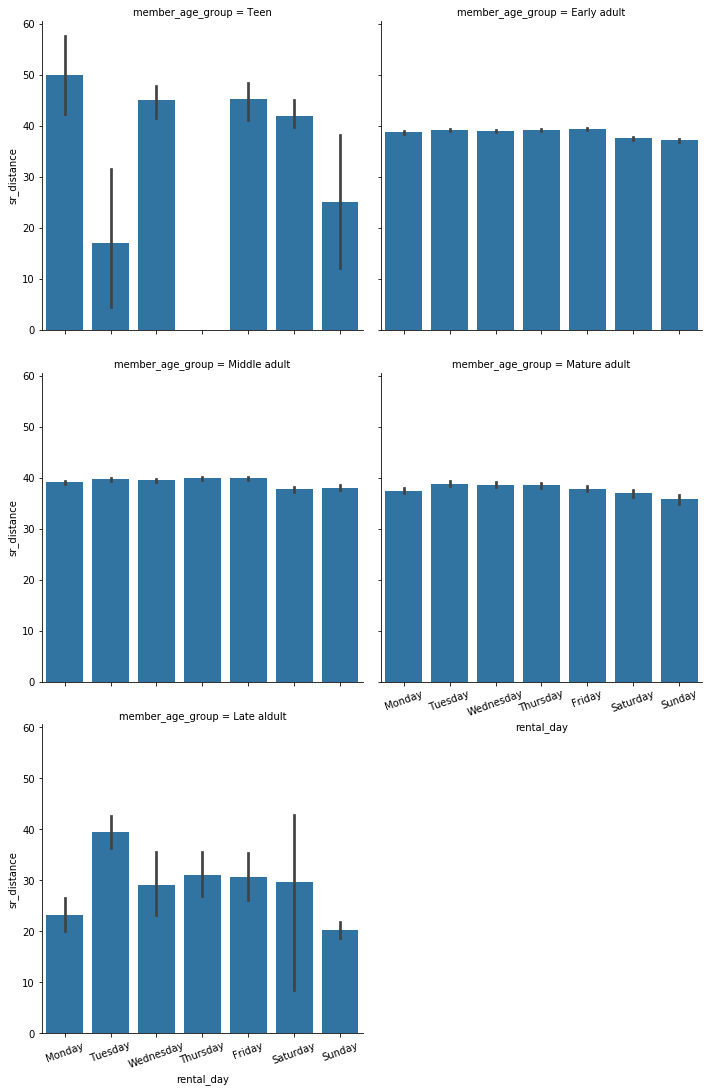

In [135]:
g = sns.FacetGrid(data = bikes, col = 'member_age_group', size = 5, col_wrap=2, margin_titles=True)
g.map(sns.barplot, 'rental_day', 'sr_distance')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=20)

The plot of travelled distance per day by age group, reveals much more than the earlier bar plots. We can see that teenagers didn't rent any by on thurdays. Long errors bars for teenagers suggest that they are less representative. Early, middle and mature adult bike travelled distance is quite constant over time.

##### `Insight  3: `  rental_day vs. duration_sec  vs member_age_group

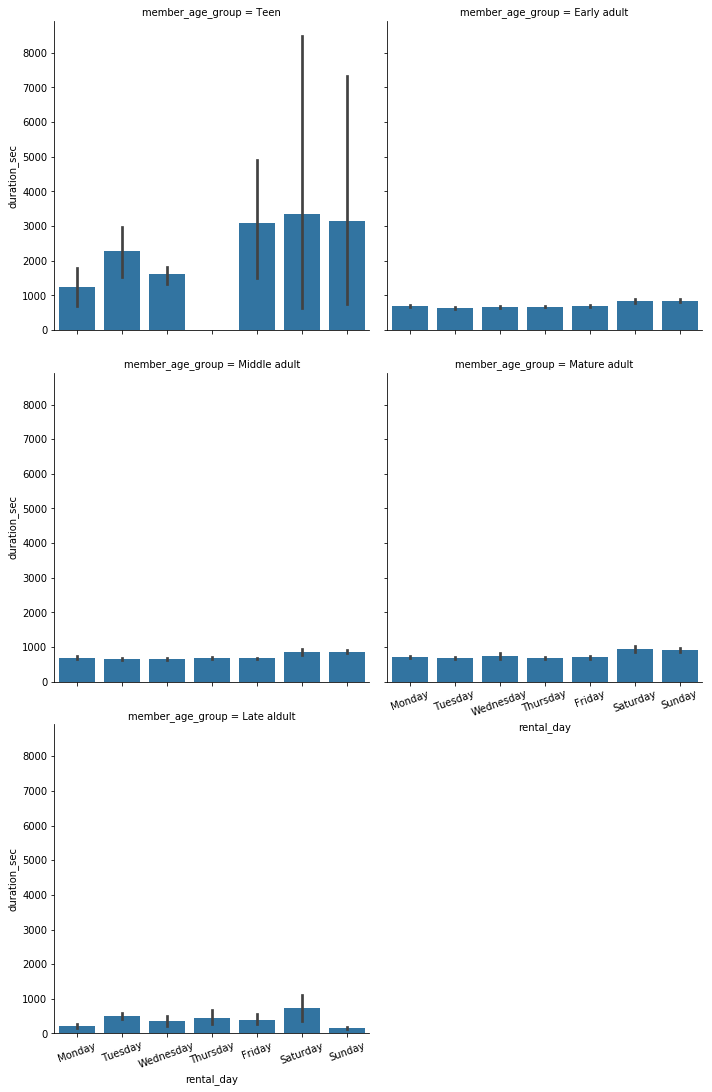

In [136]:
g = sns.FacetGrid(data = bikes, col = 'member_age_group', size = 5, col_wrap=2, margin_titles=True)
g.map(sns.barplot, 'rental_day', 'duration_sec')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=20)

The plot of rental duration per day by age group, also reveals much more than the earlier bar plots.  Teenagers didn't rent bikes on thurdays. Early, middle and mature adult bike rental duration is quite constant over time.

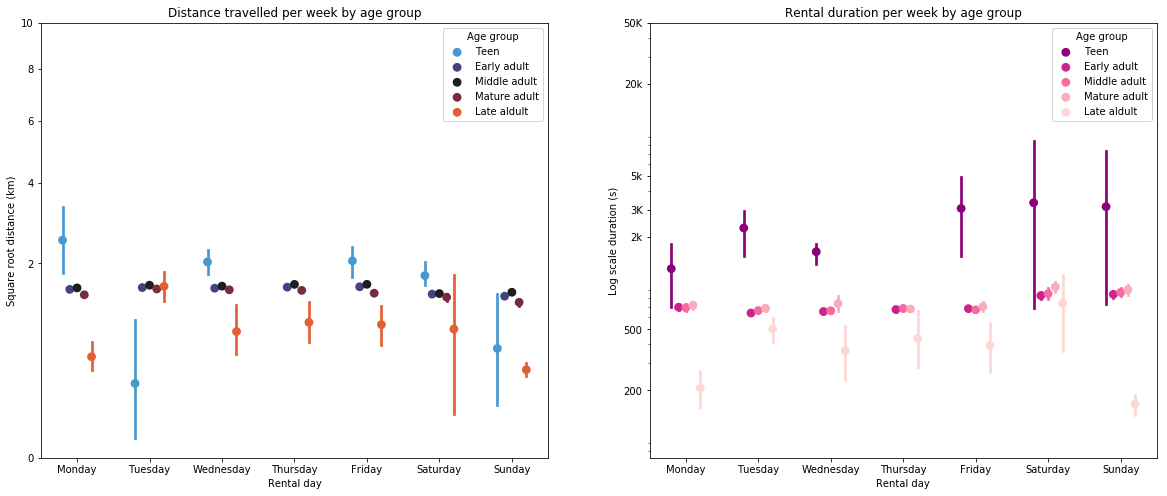

In [137]:
# multivariate plot 

# set fig size
plt.figure(figsize = [20, 8])

# distance vs. rental_day subplot
plt.subplot(1,2,1)
distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]
distance_ticks_labels = ['0', '2', '4', '6', '8', '10']
ax_dist = sns.pointplot(data = bikes, x = 'rental_day', y = 'sr_distance', hue = 'member_age_group',
                  dodge = 0.4, linestyles = "", palette = 'icefire')
plt.xlabel('Rental day')
plt.ylabel('Square root distance (km)')
plt.yticks(sqrt_trans(np.array(distance_ticks)), distance_ticks_labels)
plt.title('Distance travelled per week by age group')
plt.legend(title = 'Age group');
ax_dist.set_yticklabels([],minor = True)

# distance vs. rental_day subplot
plt.subplot(1,2,2)
duration_ticks = [200, 500, 2e3, 3e3, 5e3, 2e4, 5e4]
duration_ticks_labels = ['200', '500', '2k', '3K', '5k', '20k', '50K']
ax_dur = sns.pointplot(data = bikes, x = 'rental_day', y = 'duration_sec', hue = 'member_age_group',
                  dodge = 0.4, linestyles = "", palette = 'RdPu_r')
plt.xlabel('Rental day')
plt.ylabel('Log scale duration (s)')
plt.yscale('log')
plt.yticks(duration_ticks, duration_ticks_labels)
plt.title('Rental duration per week by age group')
plt.legend(title = 'Age group');

ax_dur.set_yticklabels([],minor = True)

plt.show()

The dodged point plots above clearly show that teenagers ride more and spend more time with bikes than adults. Adults (early, middle and mature) use of bikes is very constant over time. This last, show that adults use  bikes for periodic trips. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate explorationg reinforces the earlier assumptions. On the one hand, teenagers spend more time with bike than adults. Ford could study in depth the travel needs of teens in order a design a marketing strategy towards them. On the other, adults (early, middle and mature) on a regular basis and more during business days. Regarding the most represente age group, this suggests that most of people Ford GoBike use the service for their ponctual daily travels, especially job-related one. Data on users' profession will help us have a more clear picture on that. 

### Were there any interesting or surprising interactions between features?

The multivariate exploration reveals that teens did't rent bikes on thursday at all.